# HW4 CODE

PROBLEM 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from copy import deepcopy
import random

In [109]:
def smoothFilter(img, a, method):
    # 光滑滤波函数，len_patch是指核的大小
    height, width = img.shape
    paddingImg = np.pad(img, ((0, height), (0, width)), constant_values=0) 
    new_height, new_width = height * 2, width * 2
    y, x = np.meshgrid(np.arange(new_width),np.arange(new_height) )  # 产生横坐标与纵坐标的网络
    centralized_op = (-1) ** (x + y)     # 中心化的算子
    freqImg = np.fft.fft2(paddingImg * centralized_op)  # 离散傅里叶变换
    filter = np.sqrt((y - width) ** 2 + (x - height) ** 2)   # 各位置距离中心点距离
    if method == 'Gauss':
        sigma = a
        filter = np.exp(-filter**2/(2*sigma**2)) # 高斯低通滤波器
    if method == 'Ideal':
        filter[np.where(filter <= a)] = 1
        filter[np.where(filter > a)] = 0     # 理想低通滤波器
    new_freqImg = freqImg * filter # 对频率域滤波
    filteredImg = np.real(np.fft.ifft2(new_freqImg)) * centralized_op    # 滤波后的图片
    newImg = filteredImg[0:height, 0:width] #截取前面m,n长度的图片
    # newImg = (newImg - newImg.min()) / (newImg.max() - newImg.min()) * 255 # 归一化
    return freqImg, new_freqImg, newImg

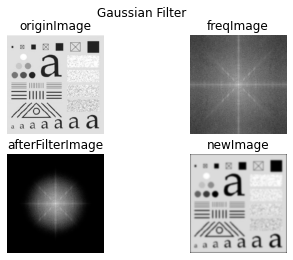

True

In [110]:
a = 50
img = cv2.imread('alphabet.png', cv2.IMREAD_GRAYSCALE)
freqImg, new_freqImg, newImg = smoothFilter(img, a, 'Gauss')
plt.suptitle(r'Gaussian Filter'.format('Gauss',a))
plt.subplot(2, 2, 1), plt.imshow(img, cmap="gray")
plt.axis("off"), plt.title("originImage")
plt.subplot(2, 2, 2), plt.imshow(np.log(np.abs(freqImg) + 1), cmap="gray")
plt.axis("off"), plt.title("freqImage")
plt.subplot(2, 2, 3), plt.imshow(np.log(np.abs(new_freqImg) + 1), cmap="gray")
plt.axis("off"), plt.title("afterFilterImage")
plt.subplot(2, 2, 4), plt.imshow(newImg, cmap="gray")
plt.axis("off"), plt.title("newImage")
plt.show()
cv2.imwrite('newimg.jpg', newImg)

In [11]:
def sharpenFilter(img, a, method):
    # 光滑滤波函数，len_patch是指核的大小
    height, width = img.shape
    paddingImg = np.pad(img, ((0, height), (0, width)), constant_values=0) 
    new_height, new_width = height * 2, width * 2
    y, x = np.meshgrid(np.arange(new_width),np.arange(new_height) )  # 产生横坐标与纵坐标的网络
    centralized_op = (-1) ** (x + y)     # 中心化的算子
    freqImg = np.fft.fft2(paddingImg * centralized_op)  # 离散傅里叶变换
    filter = (y - width) ** 2 + (x - height) ** 2  # 各位置距离中心点距离
    if method == 'Gauss':
        sigma = a
        filter = 1 - np.exp(-filter/(2*sigma**2)) # 高斯高通滤波器
    if method == 'Ideal':
        filter[np.where(filter <= a)] = 0
        filter[np.where(filter > a)] = 1     # 理想高通滤波器
    new_freqImg = freqImg * filter # 对频率域滤波
    filteredImg = np.real(np.fft.ifft2(new_freqImg)) * centralized_op    # 滤波后的图片
    newImg = filteredImg[0:height, 0:width] #截取前面m,n长度的图片
    newImg1 = img + 1 * newImg # 不同c值加上原图
    return freqImg, new_freqImg, newImg, newImg1

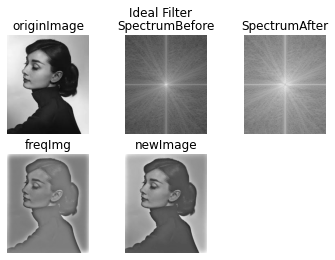

True

In [12]:
a = 10
plt.clf()
img = cv2.imread('herpen.jpg', cv2.IMREAD_GRAYSCALE)
freqImg, new_freqImg, newImg,newImg1 = sharpenFilter(img, a, 'Gauss')
plt.suptitle(r'Ideal Filter'.format('Gauss',a))
plt.subplot(2, 3, 1), plt.imshow(img, cmap="gray")
plt.axis("off"), plt.title("originImage")
plt.subplot(2, 3, 2), plt.imshow(np.log(np.abs(freqImg) + 1), cmap="gray")
plt.axis("off"), plt.title("SpectrumBefore")
plt.subplot(2, 3, 3), plt.imshow(np.log(np.abs(new_freqImg) + 1), cmap="gray")
plt.axis("off"), plt.title("SpectrumAfter")
plt.subplot(2, 3, 4), plt.imshow(newImg, cmap="gray")
plt.axis("off"), plt.title("freqImg")
plt.subplot(2, 3, 5), plt.imshow(newImg1, cmap="gray")
plt.axis("off"), plt.title("newImage")
plt.show()
cv2.imwrite('newimg2.jpg', newImg1)

In [2]:
# problem 2
def salt_pepper(img,p1=0.05,p2=0.95):
    height, width = img.shape
    polluted_img = np.array(img)
    maxvalue = np.max(img)   # 局部区域的灰度值范围
    minvalue = np.min(img)
    for i in range(height):
        for j in range(width): # 遍历每个像素点
            rand_num = random.random() # 生成0-1随机数
            if rand_num < p1:
                polluted_img[i,j] = minvalue # 椒噪声
            elif rand_num > p2:
                polluted_img[i,j] = maxvalue # 盐噪声
    return polluted_img

In [15]:
def white_noise(img, k):
    noise = np.random.normal(0,0.1,img.shape)
    newImg = noise*255+img #加白噪声
    newImg = (newImg-newImg.min())/(newImg.max()-newImg.min())*255#归一化
    return newImg

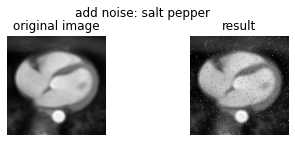

True

In [3]:
img = cv2.imread('leaf.jpg', cv2.IMREAD_GRAYSCALE) # 读入图片
a = 200 # 可调节参数
plt.clf()
newImg =salt_pepper(img, 0.01,0.99)
plt.suptitle(r'add noise: salt pepper')
plt.subplot(2, 2, 1), plt.imshow(img, cmap="gray")
plt.axis("off"), plt.title("original image")
plt.subplot(2, 2, 2), plt.imshow(newImg, cmap="gray")
plt.axis("off"), plt.title("result")
plt.show()
cv2.imwrite('newimg_leaf.jpg', newImg)

In [7]:
def cover(img,x,y,k):
    B=deepcopy(img);
    for i in range(x-k,x+k+1):
        for j in range(y-k,y+k+1):
            B[i,j]=250
    return B

In [5]:
# problem 3

def noiseRemove(img, a):
    height, width = img.shape
    paddingImg = np.pad(img, ((0, height), (0, width)), constant_values=0) 
    new_height, new_width = height * 2, width * 2
    y, x = np.meshgrid(np.arange(new_width),np.arange(new_height) )  # 产生横坐标与纵坐标的网络
    centralized_op = (-1) ** (x + y)     # 中心化的算子
    freqImg = np.fft.fft2(paddingImg * centralized_op)  # 离散傅里叶变换
    f=freqImg
    for i in range(100,600,10):
        f=cover(f,i,i,a);
        f=cover(f,730+i,730+i,a); #中心两边的斜向噪声消除
    for i in range(12,1000,10):
        f=cover(f,i+400,i,a);
        f=cover(f,i,i+400,a); # 左下和右上的斜向噪声消除
    new_freqImg=f
    filteredImg = np.real(np.fft.ifft2(new_freqImg)) * centralized_op    # 滤波后的图片
    newImg = filteredImg[0:height, 0:width] #截取前面m,n长度的图片
    return freqImg, new_freqImg, newImg

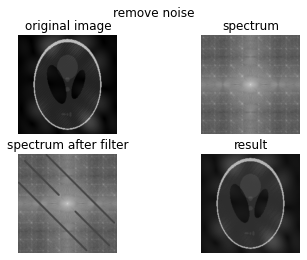

True

In [9]:
img = cv2.imread('shepp-logan.PNG', cv2.IMREAD_GRAYSCALE) # 读入图片
a = 12 # 可调节参数
plt.clf()
freqImg, new_freqImg, newImg = noiseRemove(img, a)
plt.suptitle(r'remove noise')
plt.subplot(2, 2, 1), plt.imshow(img, cmap="gray")
plt.axis("off"), plt.title("original image")
plt.subplot(2, 2, 2), plt.imshow(np.log(np.abs(freqImg) + 1), cmap="gray")
plt.axis("off"), plt.title("spectrum")
plt.subplot(2, 2, 3), plt.imshow(np.log(np.abs(new_freqImg) + 1), cmap="gray")
plt.axis("off"), plt.title("spectrum after filter")
plt.subplot(2, 2, 4), plt.imshow(newImg, cmap="gray")
plt.axis("off"), plt.title("result")
plt.show()
cv2.imwrite('newimg_removenoise.jpg', newImg)